In [1]:
import pandas as pd
import seaborn as sns # https://seaborn.pydata.org/
import matplotlib.pyplot as plt

In [2]:
# Obter base de dados
tmdb = pd.read_csv('../dados/tmdb_5000_movies.csv')
tmdb.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3]:
# Criando frame de original_languages
original_languages_frame = tmdb["original_language"].value_counts().to_frame().reset_index()
original_languages_frame.columns = ["original_language", "total"]

original_languages_frame.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


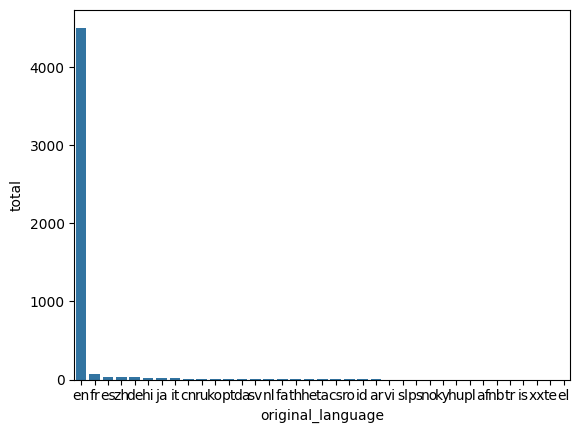

In [4]:
# Usando sns.barplot para criar um grafico de barras para a coluna original_language a partir do value_counts e utilizando o to_frame
# Não da pra notar os nuances das diferenças entre as linguas que não são inglês
sns.barplot(data=original_languages_frame, x="original_language", y="total")
plt.show()

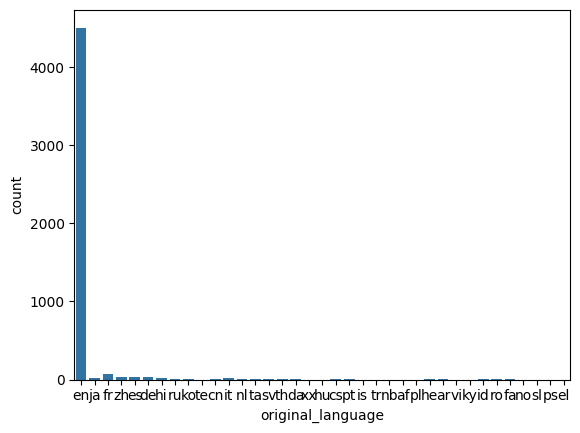

In [5]:
# Usando sns.countplot para criar um grafico de barras para a coluna original_language a partir do value_counts e utilizando o to_frame
# Não da pra notar os nuances das diferenças entre as linguas que não são inglês
sns.countplot(data=tmdb, x="original_language")
plt.show()

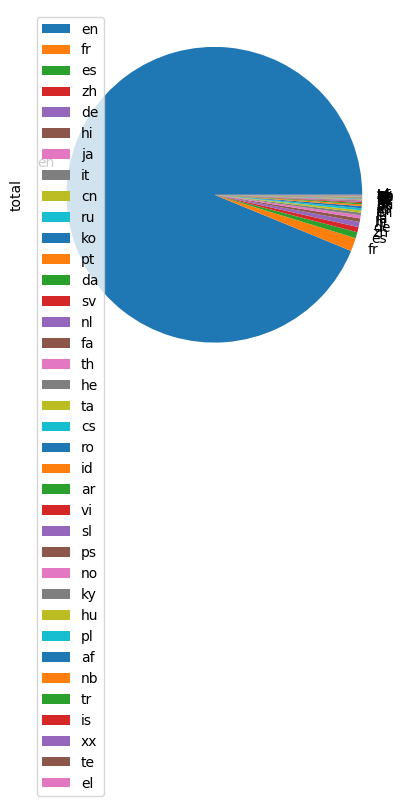

In [6]:
# Criando um gráfico de setores (pizza) que compara a quantidade de filmes por idioma
# Esse tipo de gráfico não mostra os dados adequadamente pois a diferença entre os idiomas é muito grande
# Gráficos de setores não são recomendados
original_languages_frame.plot(x="original_language", y="total", labels=original_languages_frame["original_language"], kind="pie")
plt.show()

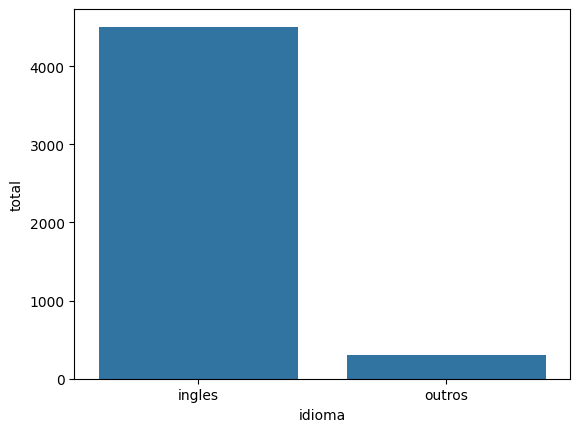

In [7]:
# Criando um data frame com os dados de idioma e exibindo um grádico de barras
# Separando os filmes em inglês dos filmes com outros idiomas

original_languages = tmdb["original_language"].value_counts()

movies_in_english = original_languages.loc["en"]
movies_not_in_english = original_languages.sum() - movies_in_english

data_dictionary = {
    "idioma": ["ingles", "outros"],
    "total": [movies_in_english, movies_not_in_english]
}

data_frame_languages = pd.DataFrame(data_dictionary)

sns.barplot(data=data_frame_languages, x="idioma", y="total")
plt.show()

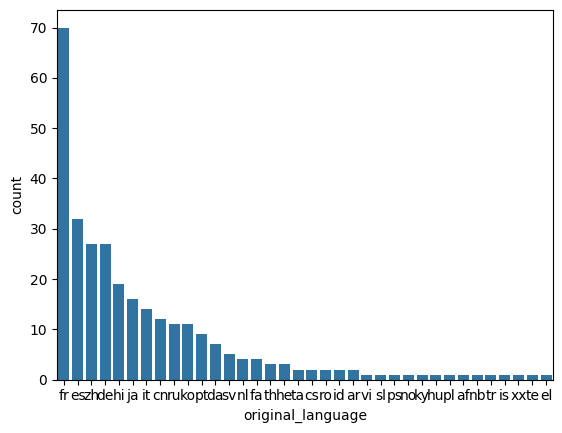

In [8]:
#Exibindo quantidade por filmes por idioma que não seja inglês

original_languages = tmdb["original_language"].value_counts().to_frame().reset_index()
languages_different_than_english = original_languages.query("original_language != 'en'")

# sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language")
sns.barplot(data=languages_different_than_english, x="original_language", y="count")
plt.show()